In [35]:
import bloch as b
import numpy as np
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
%matplotlib notebook
%matplotlib notebook

In [74]:
m = b.magentization(812*10**-3, 42*10**-3, 3)

[0. 0. 1.]


In [75]:
m.rotate(2)

<IPython.core.display.Javascript object>


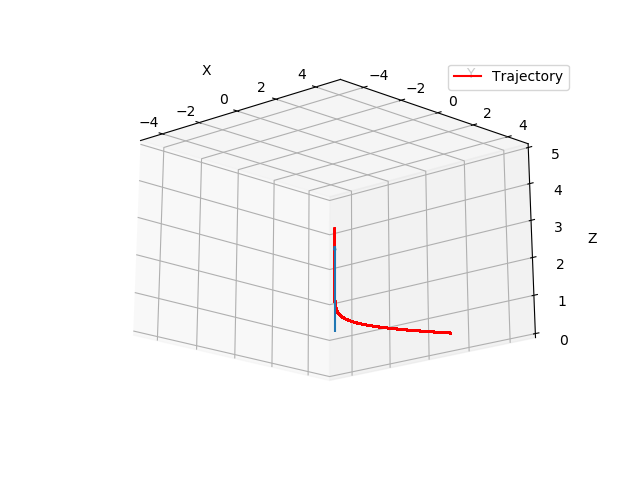

In [76]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Origin
x, y, z = (0, 0, 0)

# Directions of the vector 
u = m.array[0, 0]  # x Component 
v = m.array[0, 1]  # y Component
w = m.array[0, 2]   # z Component 

quiver = ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05)
ax.plot(m.array[:0, 0], m.array[:0, 1], m.array[:0, 2], color='r', label="Trajectory")

def update(t):
    global quiver
    u = m.array[t, 0]
    v = m.array[t, 1]
    w = m.array[t, 2]
    quiver.remove()
    quiver= ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05)
    ax.plot(m.array[:t, 0], m.array[:t, 1], m.array[:t, 2], color='r', label="Trajectory")
    
ax.set_xlim3d([-5.0, 5.0])
ax.set_xlabel('X')

ax.set_ylim3d([-5.0, 5.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 5.0])
ax.set_zlabel('Z')

ani = FuncAnimation(fig, update, frames=np.arange(0, 200), interval=200, blit= True)
# ani.save("animatio")
ax.legend()
plt.show()